Equipo 14

Integrantes:

García Hernández, Enrique Ricardo.A01315428

Hernández Camarillo, Francisco Javier. A00998083

Hernández Cerecedo, Erick de Jesus. A01066428

Hernández Navarro, José David. A01793021

Jimenez Chacón, Joan Sebastian. A01793970

# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2

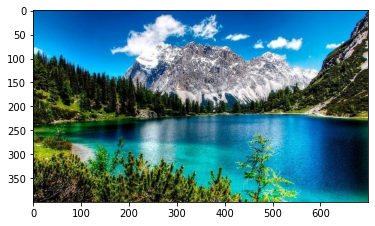

In [ ]:
original_image = Image.open('data/image.jpg')
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('data/img.npy', original_image)

#Load the image
original_image = np.load('data/img.npy')

## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image. 

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

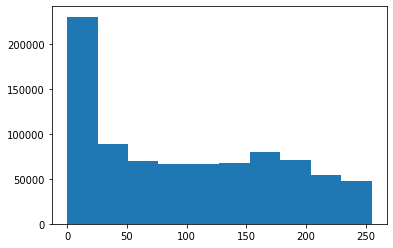

In [ ]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

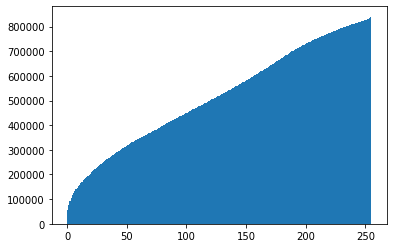

In [ ]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


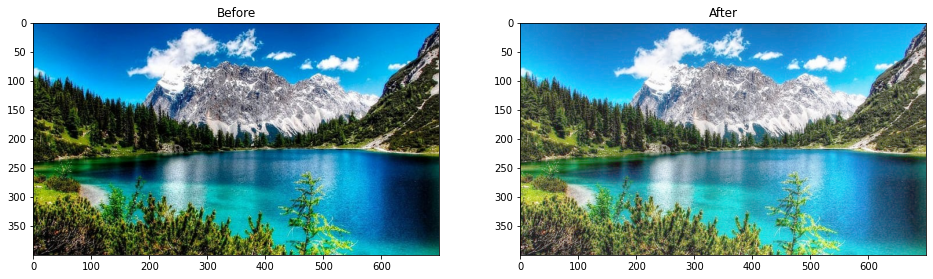

In [ ]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

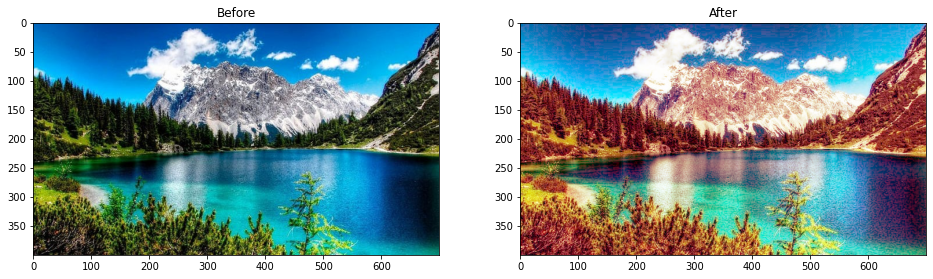

In [ ]:

# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

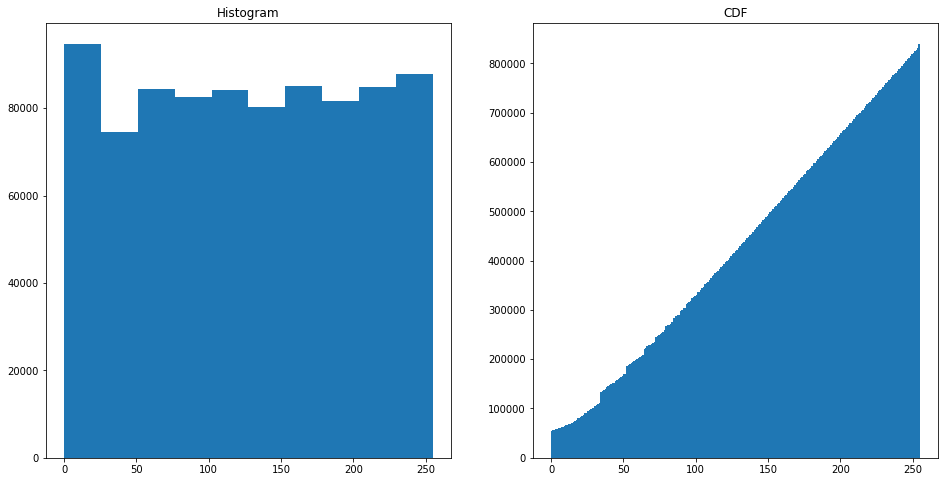

In [ ]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

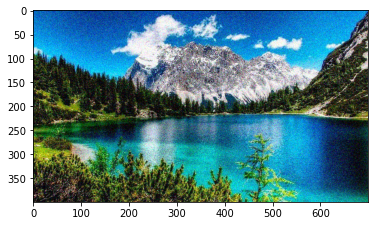

In [ ]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

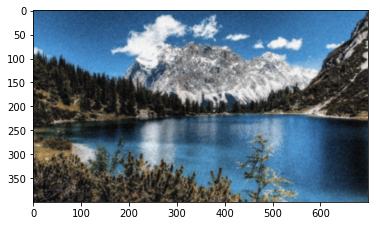

In [ ]:
img3_gauss = gauss(img_n, sigma=1)   
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

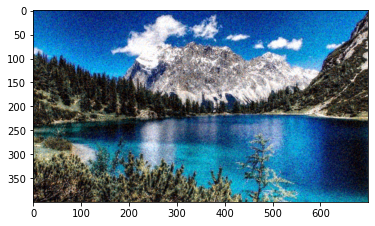

In [ ]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## Challenge <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

In [ ]:
from image_slicer import slice

n = 4
slice('Challenge/bio_low_contrast.jpg', n)

(<Tile #1 - bio_low_contrast_01_01.png>,
 <Tile #2 - bio_low_contrast_01_02.png>,
 <Tile #3 - bio_low_contrast_02_01.png>,
 <Tile #4 - bio_low_contrast_02_02.png>)

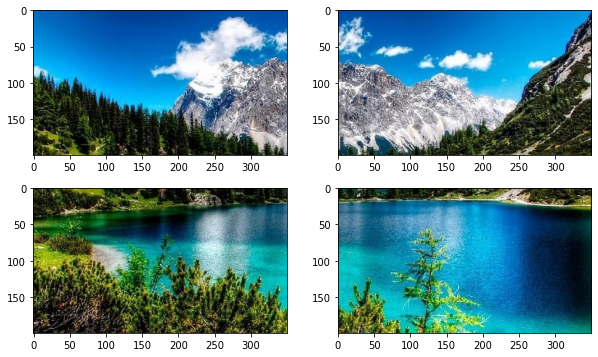

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img = Image.open(f'data/image_01_01.png')
plt.imshow(img)

plt.subplot(2,2,2)
img = Image.open(f'data/image_01_02.png')
plt.imshow(img)

plt.subplot(2,2,3)
img = Image.open(f'data/image_02_01.png')
plt.imshow(img)

plt.subplot(2,2,4)
img = Image.open(f'data/image_02_02.png')
plt.imshow(img)

plt.show()

Investiga e implementa el método tile-based histogram equalization. En estos métodos, la imagen se particiona en diferentes ventanas (i.e. mosaicos) y los histogramas se calculan de forma independiente, aplicando la corrección sobre cada ventana. Existe un compromiso entre el tamaño de la ventana y la complejidad computacional, por lo cual es más complejo que el método simple. Implementa esta versión y realiza algunas pruebas variando el tamaño de la ventana. Otro inconveniente es que se puede observar posibles diferencias entre los el contraste de los bloques, ¿cómo podría mejorarse?

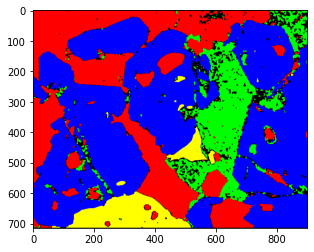

In [ ]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np

img = io.imread("Challenge/BSE_Google_noisy.jpg")
#plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')  

#Let's clean the noise using edge preserving filter.
#As mentioned in previous tutorial, my favorite is NLM

from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float

float_img = img_as_float(img)
sigma_est = np.mean(estimate_sigma(float_img, multichannel=True))


denoise_img = denoise_nl_means(float_img, h=1.15 * sigma_est, fast_mode=False, 
                               patch_size=5, patch_distance=3, multichannel=True)
                           
denoise_img_as_8byte = img_as_ubyte(denoise_img)
#plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')

#Let's look at the histogram to see howmany peaks we have. 
#Then pick the regions for our histogram segmentation.

#plt.hist(denoise_img_as_8byte.flat, bins=100, range=(0,100))  #.flat returns the flattened numpy array (1D)


segm1 = (denoise_img_as_8byte <= 57)
segm2 = (denoise_img_as_8byte > 57) & (denoise_img_as_8byte <= 110)
segm3 = (denoise_img_as_8byte > 110) & (denoise_img_as_8byte <= 210)
segm4 = (denoise_img_as_8byte > 210)

#How to show all these images in single visualization?
#Construct a new empty image with same shape as original except with 3 layers.
#print(median_img.shape[0])
all_segments = np.zeros((denoise_img_as_8byte.shape[0], denoise_img_as_8byte.shape[1], 3)) #nothing but denoise img size but blank

all_segments[segm1] = (1,0,0)
all_segments[segm2] = (0,1,0)
all_segments[segm3] = (0,0,1)
all_segments[segm4] = (1,1,0)
plt.imshow(all_segments)

#Lot of yellow dots, red dots and stray dots. how to clean
#We can use binary opening and closing operations. Open takes care of isolated pixels within the window
#Closing takes care of isolated holes within the defined window

from scipy import ndimage as nd

segm1_opened = nd.binary_opening(segm1, np.ones((3,3)))
segm1_closed = nd.binary_closing(segm1_opened, np.ones((3,3)))

segm2_opened = nd.binary_opening(segm2, np.ones((3,3)))
segm2_closed = nd.binary_closing(segm2_opened, np.ones((3,3)))

segm3_opened = nd.binary_opening(segm3, np.ones((3,3)))
segm3_closed = nd.binary_closing(segm3_opened, np.ones((3,3)))

segm4_opened = nd.binary_opening(segm4, np.ones((3,3)))
segm4_closed = nd.binary_closing(segm4_opened, np.ones((3,3)))

all_segments_cleaned = np.zeros((denoise_img_as_8byte.shape[0], denoise_img_as_8byte.shape[1], 3)) #nothing but 714, 901, 3

all_segments_cleaned[segm1_closed] = (1,0,0)
all_segments_cleaned[segm2_closed] = (0,1,0)
all_segments_cleaned[segm3_closed] = (0,0,1)
all_segments_cleaned[segm4_closed] = (1,1,0)

plt.imshow(all_segments_cleaned)  #All the noise should be cleaned now

Investiga cómo funciona el algoritmo CLAHE (contrast limited adaptive histogram equalization) y realiza una implementación (puede ser usando la implementación de OpenCV). Prueba sobre diferentes tipos de imágenes y compara con el método de ecualización de histogramas básico. Provee una breve descripción del método a partir de una  investigación bibliográfica.


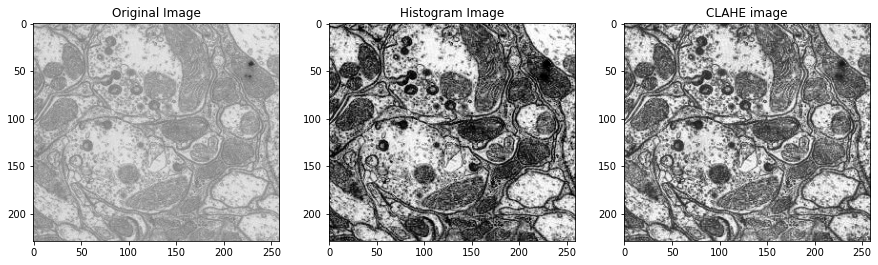

In [ ]:
import cv2
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread("Challenge/bio_low_contrast.jpg", 1)
#img = cv2.imread('images/retina.jpg', 1)

#Converting image to LAB Color so CLAHE can be applied to the luminance channel
lab_img= cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

#Splitting the LAB image to L, A and B channels, respectively
l, a, b = cv2.split(lab_img)

#plt.hist(l.flat, bins=100, range=(0,255))
###########Histogram Equlization#############
#Apply histogram equalization to the L channel
equ = cv2.equalizeHist(l)

#plt.hist(equ.flat, bins=100, range=(0,255))
#Combine the Hist. equalized L-channel back with A and B channels
updated_lab_img1 = cv2.merge((equ,a,b))

#Convert LAB image back to color (RGB)
hist_eq_img = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)

###########CLAHE#########################
#Apply CLAHE to L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_img = clahe.apply(l)
#plt.hist(clahe_img.flat, bins=100, range=(0,255))

#Combine the CLAHE enhanced L-channel back with A and B channels
updated_lab_img2 = cv2.merge((clahe_img,a,b))

#Convert LAB image back to color (RGB)
CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)


# Crea una figura de 3 columnas y 1 fila
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Muestra la primera imagen
axs[0].imshow(img)
axs[0].set_title("Original Image")

# Muestra la segunda imagen
axs[1].imshow(hist_eq_img)
axs[1].set_title("Histogram Image")

# Muestra la tercera imagen
axs[2].imshow(CLAHE_img)
axs[2].set_title("CLAHE image")

# Muestra la figura
plt.show()
